<a href="https://colab.research.google.com/github/r-matsuzaka/aws-saa-solve-problem/blob/main/notebook/aws_saa_problem_choice_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd


random.seed(8)

n_batch = 39
n_section = 10#number of problem per batch
n_skip = -1#number of batch to skip. -1 means no skip
title = "test"

In [2]:
from google.colab import drive

google_drive_path = '/content/drive'
drive.mount(google_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sections = list(range(1,7))
problems = list(range(1,66))
all = []

for v1 in sections:
    for v2 in problems:
        all.append(str(v1) + "-" + str(v2))

In [4]:
dir_path = f'{google_drive_path}/MyDrive/aws_saa_practice/res'
res_path = pathlib.Path(dir_path)
csv_path = pathlib.Path(f'{dir_path}/{title}.csv')

def output_res(chosen_problem, your_ans, ans):
  if not res_path.exists():
    res_path.mkdir(parents=True)

  if csv_path.exists():
    res_df = pd.read_csv(csv_path, index_col=0)
    
  else:
    res_df = pd.DataFrame(columns=["your_ans", "ans"])

  if chosen_problem in res_df.index:
    print("filled")

  res_df.loc[chosen_problem] = [your_ans, ans]
  res_df.to_csv(csv_path, index = True)

In [5]:
def answer_problem(shuffled_questions, i_batch, skip):
  """
  Args:
    shuffled_questions
    i_batch(int): number of ith batch
    skip(bool)
  """
  correct_cnt = 0

  for i in range(n_section):
    chosen_problem = shuffled_questions[n_section * i_batch + i]
    print(f"Question{i} is {chosen_problem}")

    if skip:
      print("skipped")

    elif not skip:
      if csv_path.exists():
        res_df = pd.read_csv(csv_path, index_col=0)

        if chosen_problem in res_df.index:
          res_df = pd.read_csv(csv_path, index_col=0)
          print("filled")
          your_ans = res_df["your_ans"][chosen_problem]
          ans = res_df["ans"][chosen_problem]

        else:
          your_ans = 1#int(input())
          ans = 1#int(input())
          output_res(chosen_problem, your_ans, ans)

      else:
        your_ans = 1#int(input())
        ans = 1#int(input())
        output_res(chosen_problem, your_ans, ans)

    
      if your_ans == ans:
      #print("correct")
        correct_cnt += 1
      #else: 
      #print("wrong")
  
  if not skip:
    correct_percent = int(100 * correct_cnt / n_section)

    print(f"score is {correct_percent}")

    return correct_percent

In [6]:
def plot_score(correct_percents:list):
  plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
  n = len(correct_percents)
  plt.title(f"{title}")
  plt.plot(list(range(1, n+1)),correct_percents,color="r")
  plt.xlabel("number of batch")
  plt.ylabel("score [%]")
  plt.ylim(0,110)
  plt.grid()


In [7]:
def average(lst):
  ave = sum(lst) / len(lst)
  print(f"average score is {ave}")



Batch 1
------------------------------
Question0 is 2-52
Question1 is 3-60
Question2 is 3-63
Question3 is 1-65
Question4 is 2-34
Question5 is 6-36
Question6 is 1-23
Question7 is 1-44
Question8 is 2-6
Question9 is 2-62
score is 100


Batch 2
------------------------------
Question0 is 4-65
Question1 is 2-43
Question2 is 4-11
Question3 is 6-4
Question4 is 1-16
Question5 is 4-41
Question6 is 4-55
Question7 is 4-38
Question8 is 4-5
Question9 is 4-59
score is 100


Batch 3
------------------------------
Question0 is 5-34
Question1 is 6-61
Question2 is 4-12
Question3 is 1-46
Question4 is 4-54
Question5 is 2-55
Question6 is 1-11
Question7 is 6-34
Question8 is 3-7
Question9 is 5-7
score is 100


Batch 4
------------------------------
Question0 is 4-14
Question1 is 4-48
Question2 is 3-65
Question3 is 1-59
Question4 is 6-15
Question5 is 3-3
Question6 is 1-50
Question7 is 1-33
Question8 is 4-3
Question9 is 5-58
score is 100


Batch 5
------------------------------
Question0 is 3-64
Question1 is

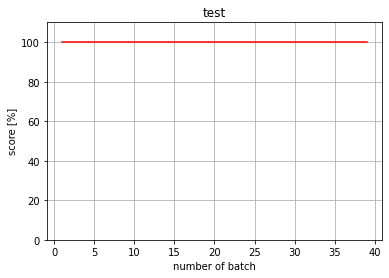

In [8]:
correct_percents = []
shuffled_questions = random.sample(all,len(all))

for i_batch in range(n_batch):
  print("\n")
  print(f"Batch {i_batch+1}")
  print("------------------------------")

  skip = False

  if i_batch <= n_skip:
    skip = True
    
  correct_percent = answer_problem(shuffled_questions, i_batch, skip)
  correct_percents.append(correct_percent)

correct_percents_wo_none = [x for x in correct_percents if x]
plot_score(correct_percents_wo_none)

average(correct_percents_wo_none)